<a href="https://colab.research.google.com/github/Lesiazhou/QM2/blob/main/UPDATED_NDVI_salinity_%2B_water_volume%2C_water_characteristics_vs_NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ee
import pandas as pd
import numpy as np
from datetime import datetime

ee.Authenticate()
ee.Initialize(project='yokomultilinear')


In [ ]:
roi = ee.Geometry.Polygon([
    [
        [60.286329088587394, 47.05784753424885],
        [61.8734050779542, 46.717316850454495],
        [62.242492517342725, 46.04898165120849],
        [62.42703623703642, 45.6311486297343],
        [62.18712940143365, 45.229675811475516],
        [61.781133218107925, 44.67462786656117],
        [60.9506864794846, 43.9882091130184],
        [60.70155245789806, 43.22656261187322],
        [59.81988922233293, 42.42319084197277],
        [59.24030351715686, 42.34073789685709],
        [58.695063631546304, 42.48021021361154],
        [58.42029707501882, 42.92192144563498],
        [58.19275602039386, 43.23863233263961],
        [58.10514887171084, 43.69172846564163],
        [57.82224913104005, 44.462076648787814],
        [57.90985627972185, 44.98874927009652],
        [58.233328828697466, 45.61914032817458],
        [58.62419149204436, 46.11186668739606],
        [59.311510532225725, 46.59177711420847],
        [59.796719355690755, 46.77670032142652],
        [60.26845015628146, 47.04830692107981]
    ]
])

In [ ]:
modis = ee.ImageCollection('MODIS/006/MOD13Q1').filterBounds(roi)
avhrr = ee.ImageCollection('NOAA/CDR/AVHRR/NDVI/V5').filterBounds(roi).filterDate('1980-01-01', '1998-12-31')


/usr/local/lib/python3.10/dist-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for MODIS/006/MOD13Q1! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MOD13Q1

  warnings.warn(warning, category=DeprecationWarning)


In [ ]:
def extract_pixel_ndvi(image):
    ndvi = image.select('NDVI')
    samples = ndvi.addBands(image.metadata('system:time_start','date')).sample(
        region=roi,
        scale=500,
        projection=ndvi.projection(),
        geometries=True
    )
    return samples

In [ ]:
data = []

In [ ]:
avhrr_ndvi = avhrr.map(lambda image: image.select('NDVI').multiply(0.0001))

Combining 2 datasets as there is no dataset with continuous data from 1980s till 2004 (dam built in 2005)

In [ ]:


ee.Authenticate()
ee.Initialize(project='yokomultilinear')



# AVHRR GAC NDVI dataset (1980-1998)
avhrr_ndvi = ee.ImageCollection('NOAA/CDR/AVHRR/NDVI/V5').filterBounds(roi)

# MODIS dataset (2000-2004)
modis_ndvi = ee.ImageCollection('MODIS/006/MOD13Q1').filterBounds(roi)

def extract_pixel_ndvi(image):
    ndvi = image.select('NDVI')
    samples = ndvi.addBands(image.metadata('system:time_start', 'date')).sample(
        region=roi,
        scale=5000,  # Adjust scale
        projection=ndvi.projection(),
        geometries=True
    )
    return samples

yearly_data = []

# Extract yearly average NDVI from AVHRR (1980-1999)
for year in range(1980, 2000):
    yearly_avhrr = avhrr_ndvi.filterDate(str(year) + '-01-01', str(year) + '-12-31')

    if yearly_avhrr.size().getInfo() > 0:
        # Mask fill values
        yearly_avhrr = yearly_avhrr.map(lambda image: image.updateMask(image.select('NDVI').neq(-32768)))

        # Calculate yearly average NDVI
        yearly_mean_ndvi = yearly_avhrr.mean().clip(roi).reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=roi,
            scale=5000
        ).get('NDVI')

        ndvi_value = yearly_mean_ndvi.getInfo()
        # Rescale AVHRR NDVI
        ndvi_value = (ndvi_value / 2550)

        # Optional: Filter outliers or extreme values here (using thresholds, IQR, etc.)

        yearly_data.append([year, ndvi_value, 'AVHRR'])
    else:
        print(f"No AVHRR images found for year {year}. Skipping...")

# Extract yearly average NDVI from MODIS (2000-2004)
for year in range(2000, 2005):
    yearly_modis = modis_ndvi.filterDate(str(year) + '-01-01', str(year) + '-12-31')

    if yearly_modis.size().getInfo() > 0:
        # Calculate yearly average NDVI
        yearly_mean_ndvi = yearly_modis.mean().clip(roi).reduceRegion(
            reducer=ee.Reducer.mean(),
            geometry=roi,
            scale=5000  # Adjust scale
        ).get('NDVI')

        ndvi_value = yearly_mean_ndvi.getInfo()
        # Rescale MODIS NDVI (original data is between 0 and 10000)
        ndvi_value = ndvi_value / 10000

        yearly_data.append([year, ndvi_value, 'MODIS'])
    else:
        print(f"No MODIS images found for year {year}. Skipping...")

# Create a pandas DataFrame
df = pd.DataFrame(yearly_data, columns=['year', 'ndvi', 'source'])

# Print the DataFrame
print(df)

No AVHRR images found for year 1980. Skipping...
    year      ndvi source
0   1981  0.456717  AVHRR
1   1982  0.302966  AVHRR
2   1983  0.313053  AVHRR
3   1984  0.301992  AVHRR
4   1985  0.317433  AVHRR
5   1986  0.285627  AVHRR
6   1987  0.310313  AVHRR
7   1988  0.311865  AVHRR
8   1989  0.253266  AVHRR
9   1990  0.300415  AVHRR
10  1991  0.317312  AVHRR
11  1992  0.305150  AVHRR
12  1993  0.320836  AVHRR
13  1994  0.344549  AVHRR
14  1995  0.364707  AVHRR
15  1996  0.337529  AVHRR
16  1997  0.385210  AVHRR
17  1998  0.360696  AVHRR
18  1999  0.366219  AVHRR
19  2000  0.076657  MODIS
20  2001  0.063584  MODIS
21  2002  0.091257  MODIS
22  2003  0.090325  MODIS
23  2004  0.095024  MODIS


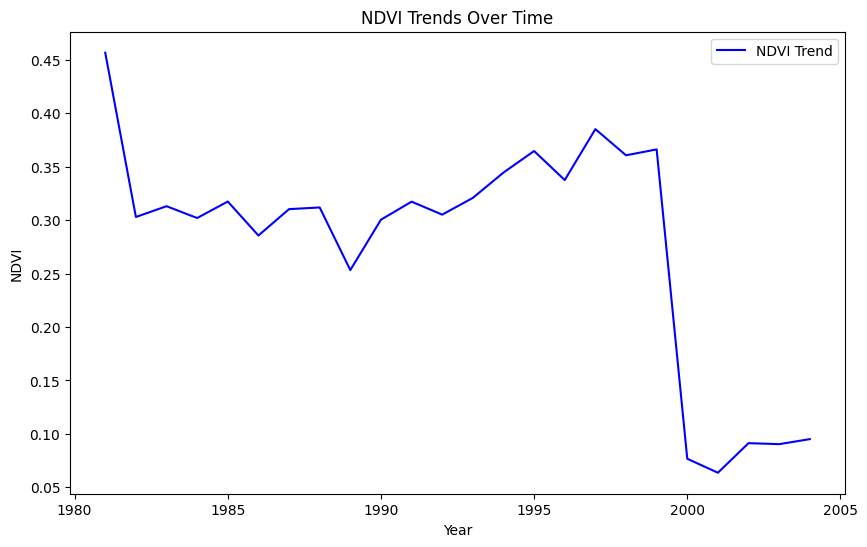

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot combined data with connected lines
ax.plot(df['year'], df['ndvi'], label='NDVI Trend', color='blue')  # Plot combined data

# Set plot title and labels
ax.set_title('NDVI Trends Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('NDVI')

# Add legend
ax.legend()

# Display the plot
plt.show()

Importing data for salinity (g/l) and water level(m)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving UPDATED_salinity.waterlevel.csv to UPDATED_salinity.waterlevel.csv


In [ ]:
df=pd.read_csv('UPDATED_salinity.waterlevel.csv')
df.head(10)

,Year,Salinity,Water Level,NDVI
0,1981,17.7,45.18,0.1160
1,1982,18.8,44.39,0.0770
2,1983,20.3,43.55,0.0799
3,1984,31.9,42.75,0.0770
4,1985,22.9,41.94,0.0810
5,1986,22.9,41.02,0.0720
6,1987,23.9,40.19,0.0790
7,1988,25.0,39.67,0.0790
8,1989,28.3,39.10,0.0640
9,1990,30.4,38.24,0.0770


In [ ]:
summary=df.describe()
summary=summary.T
summary

,count,mean,std,min,25%,50%,75%,max
Year,24.0,1992.500000,7.071068,1981.000,1986.7500,1992.500,1998.2500,2004.000
Salinity,24.0,39.337500,19.078164,17.700,24.7250,33.400,50.0000,86.300
Water Level,24.0,37.505833,4.188342,31.090,34.1525,37.075,40.3975,45.180
NDVI,24.0,0.083612,0.011404,0.063,0.0770,0.081,0.0910,0.116


NDVI = β0 + β1 * Salinity + β2 * Water_Level + ε

- NDVI: The dependent variable
- Salinity: The first predictor variable
- Water_Level: The second predictor variable
- β0: The intercept (the value of NDVI when salinity and water level are 0)
- β1: The coefficient for salinity (the change in NDVI for a unit change in salinity)
- β2: The coefficient for water level (the change in NDVI for a unit change in water level)
- ε: The error term (the difference between the observed and predicted NDVI values)

In [ ]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
Water_Level = df['Water Level']
model = ols('NDVI ~ Salinity + Water_Level', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.8497
Date:                Tue, 07 Jan 2025   Prob (F-statistic):              0.442
Time:                        20:48:23   Log-Likelihood:                 74.761
No. Observations:                  24   AIC:                            -143.5
Df Residuals:                      21   BIC:                            -140.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0270      0.058      0.469      

# **Aral sea morphometric characteristics---water volume + water surface area + water volume (1981-2004) vs NDVI**

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import ee
import pandas as pd
import numpy as np
from datetime import datetime
df1=pd.read_csv('Aral_Sea_Characteristics__1981-2004_.csv')
df1.head(10)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
ndvi_df = pd.read_csv('Year_NDVI.csv')
ndvi_df.rename(columns={'Years': 'Year'}, inplace=True)
merged_df = pd.merge(df1, ndvi_df, on="Year")
merged_df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

normalized_df = merged_df.copy()
for column in ["Water Level (m)", "Water Surface Area (thousand km²)", "Water Volume (km³)"]:
    normalized_df[column] = (merged_df[column] - merged_df[column].min()) / (merged_df[column].max() - merged_df[column].min())

plt.figure(figsize=(12, 6))
plt.plot(normalized_df["Year"], normalized_df["Water Level (m)"], label="Water Level (Normalized)", color="blue")
plt.plot(normalized_df["Year"], normalized_df["Water Surface Area (thousand km²)"], label="Water Surface Area (Normalized)", color="green")
plt.plot(normalized_df["Year"], normalized_df["Water Volume (km³)"], label="Water Volume (Normalized)", color="red")

plt.legend()
plt.title("Normalized Trends of Aral Sea Characteristics (1981-2004)")
plt.xlabel("Year")
plt.ylabel("Normalized Value")
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
water_level = merged_df['Water Level (m)']
water_surface_area=merged_df['Water Surface Area (thousand km²)']
water_volume=merged_df['Water Volume (km³)']
NDVI=merged_df['NDVI']
model = ols('NDVI ~ water_level + water_surface_area + water_volume', data=merged_df).fit()
print(model.summary())

NDVI = β0 + β1 * water_level + β2 * water_surface_area + β3 * water_volume + ε

*   NDVI: The dependent variable
*   water_level: The first predictor variable
*   water_surface_area: The second predictor variable
*   water_volume:  The third predictor variable


*   β0: The intercept (the value of NDVI when all factors are 0)
*   β1: The coefficient for water levl (the change in NDVI for a unit change in salinity)
*   β2: The coefficient for water surface area (the change in NDVI for a unit change in water level)
*   β3: The coefficient for water volume
*   ε: The error term (the difference between the observed and predicted NDVI values)



# **Results**
The OLS regression results show that the model explains 41.1% of the variance in NDVI (R² = 0.411) and is statistically **significant overall** (F-statistic p = 0.0127).

*   Among the variables, only **Water Volume** has a significant negative impact on NDVI(p = 0.005)
*   Water Level and Water Surface Area are not significant predictors.